In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import pandas as pd
from scipy.integrate import trapezoid
import sympy as sp

Parâmetros do problema

In [2]:
# Perfil de folio NACA 4412

Va = 5 * 0.514444               # Velocidade do fluxo incidente (m/s)
rho = 1025                      # Densidade da água do mar (kg/m³)
N_blade = 4                     # Numero de pás
R_prop = 5.5/2                  # Diâmetro do propulsor (m)
R_bosso = 0.3*R_prop            # Diâmetro do bosso (m)
R_blade = R_prop - R_bosso      # Raio da pá (m)

theta_blade = np.deg2rad(36)    # Angulo de passo da pá (rad)
phi_bosso = np.deg2rad(54)      # Angulo de passo do bosso (rad)
phi_ponta = np.deg2rad(22)      # Angulo de passo da ponta (rad)

a = np.array([0.5888, 0.4523, 0.3482, 0.2648, 0.1981, 0.1436, 0.0987])  # Fator de inducao axial
J = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])                       # Coeficiente de avanço

In [3]:
# Ler o arquivo de coeficientes hidrodinâmicos
df = pd.read_csv('coef.txt', sep='\\s+', skiprows=1, header=None)

df.columns = ['Angulo_Ataque', 'Coef_Lift', 'Coef_Drag']

alpha = df['Angulo_Ataque'].values
Cl = df['Coef_Lift'].values
Cd = df['Coef_Drag'].values

Resolução - Teoria de Disco Atuador

In [21]:
# Calculo de outros parâmetros
n = Va / (J * 2*R_prop)                             # Rotação do propulsor (rev/s)
omega = n * 2 * np.pi                               # Velocidade angular (rad/s)

In [22]:
r = np.linspace(R_bosso, R_prop, len(a))  # Divisão do raio em segmentos


# Calculo do empuxo T
dT = 4*rho*np.pi*r*Va**2*a*(1 + a)
# Integra usando trapezoid
T = N_blade*trapezoid(dT, r)
Kt_est = T / (rho * n**2 * (2*R_prop)**4)
print("Kt experimental:", Kt_est)


# Calculo do torque Q
dQ = 4*rho*np.pi*r**3*Va*omega*(1 + a)
Q = N_blade*trapezoid(dQ, r)
Kq_est = Q / (rho * n**2 * (2*R_prop)**5)
print("Kq experimental:", Kq_est)


# Calculo do rendimento nu
nu_est = (Kt_est * J) / (2 * np.pi * Kq_est)
print("Rendimento:", nu_est)

Kt experimental: [0.90755081 1.18537248 1.50023705 1.8521445  2.24109485 2.66708809
 3.13012421]
Kq experimental: [2.60305577 3.39990957 4.30301055 5.31235871 6.42795404 7.64979654
 8.97788622]
Rendimento: [0.03884236 0.04439127 0.04994018 0.05548909 0.061038   0.06658691
 0.07213582]


Resolução - Teoria de Elemento de Pá

In [36]:
phi = np.linspace(phi_bosso, phi_ponta, len(alpha))         # Distribuição do ângulo de passo ao longo da pá (rad)
r = np.linspace(R_bosso, R_prop, len(alpha))                # Divisão do raio em segmentos (m)
W2 = Va*(1+a[3]) / np.sin(phi)

dT_est = 0.5 * rho * W2**2 * (2 * r * np.tan(theta_blade / 2)) * (Cl * np.cos(phi) - Cd * np.sin(phi))
T_est = N_blade * trapezoid(dT_est, r)
Kt_est = T_est / (rho * n**2 * (2*R_prop)**4)


dQ_est = 0.5 * rho * W2**2 * (2 * r * np.tan(theta_blade / 2)) * r * (Cl * np.sin(phi) + Cd * np.cos(phi))
Q_est = N_blade * trapezoid(dQ_est, r)
Kq_est = Q_est / (rho * n**2 * (2*R_prop)**5)

nu_est = (Kt_est * J) / (2 * np.pi * Kq_est)

Resultados obtidos

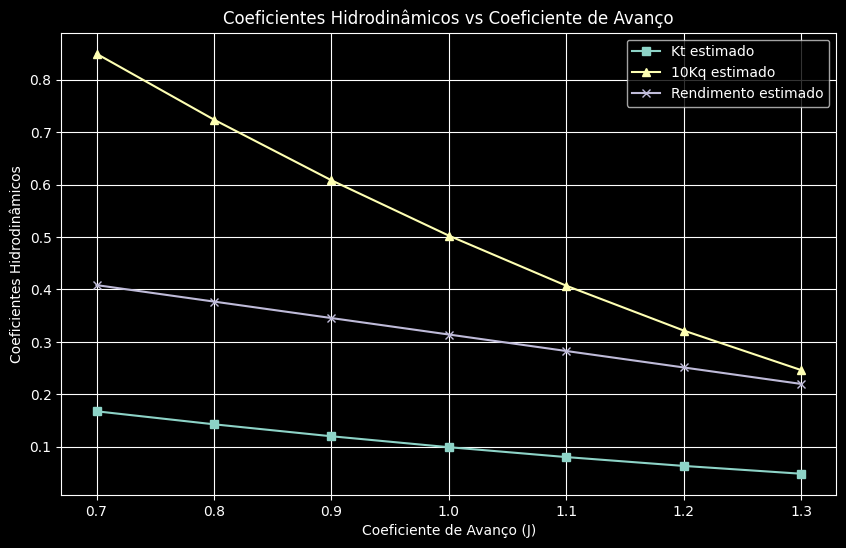

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(J, np.flip(Kt_est), marker='s', label='Kt estimado')
plt.plot(J, np.flip(10*Kq_est), marker='^', label='10Kq estimado')
plt.plot(J, np.flip(nu_est), marker='x', label='Rendimento estimado')
plt.xlabel('Coeficiente de Avanço (J)')
plt.ylabel('Coeficientes Hidrodinâmicos')
plt.title('Coeficientes Hidrodinâmicos vs Coeficiente de Avanço')
plt.legend()
plt.grid(True)
plt.show()  

Resultados para conferência posterior

In [7]:
# Ler o arquivo de resultados
df = pd.read_csv('results.txt', sep='\\s+')

df.columns = ['a(J)', 'Kt(J)', 'Kq(J)', 'Rendimento(J)']

a_res = df['a(J)'].values
Kt_res = df['Kt(J)'].values
Kq_res = df['Kq(J)'].values
rend_res = df['Rendimento(J)'].values

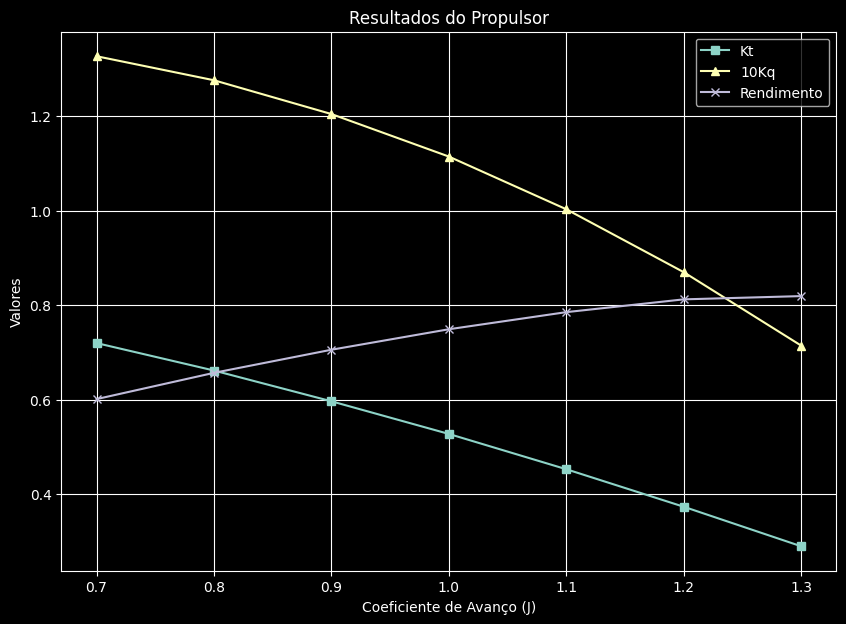

In [8]:
# Cria um gráfico com os resultados
plt.figure(figsize=(10, 7))
plt.plot(J, Kt_res, marker='s')
plt.plot(J, 10*Kq_res, marker='^')
plt.plot(J, rend_res, marker='x')
plt.title('Resultados do Propulsor')
plt.xlabel('Coeficiente de Avanço (J)')
plt.ylabel('Valores')
plt.legend(['Kt', '10Kq', 'Rendimento'])
plt.grid(True)
plt.show()